In [2]:
import os
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp

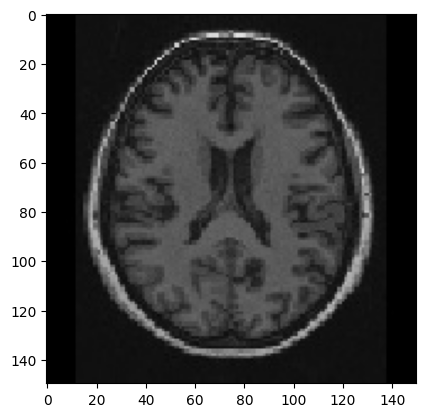

In [4]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/brain/train/normal/normal_train_1.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

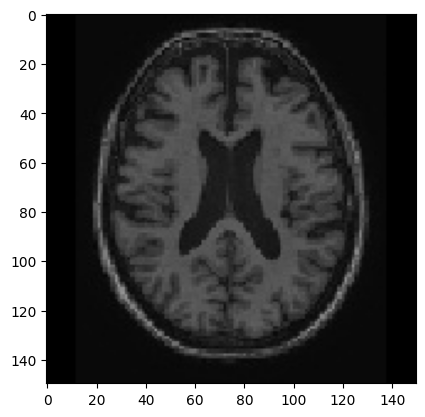

In [5]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/brain/train/ad/ad_train_1.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

In [ ]:
# 비정상과 비정상뇌의 이미지를 분류하는 Convolutional network model을 학습시키시오..

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, initializers, regularizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
# ImageDataGenerator 객체 - 이미지 변형
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Img 불러오는 객체
train_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/brain/train',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
) # y : labelencoding

Found 160 images belonging to 2 classes.


In [11]:
test_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/brain/test',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
) # y : labelencoding

Found 120 images belonging to 2 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary cls
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
hist = model.fit(
    train_data_importer,
    epochs=5,
    validation_data=test_data_importer
)

Epoch 1/5
32/32 [==============================] - 198s 6s/step - loss: 0.6643 - accuracy: 0.5625 - val_loss: 0.7604 - val_accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 1s 34ms/step - loss: 0.5505 - accuracy: 0.7688 - val_loss: 0.3594 - val_accuracy: 0.8667
Epoch 3/5
32/32 [==============================] - 1s 35ms/step - loss: 0.2548 - accuracy: 0.9062 - val_loss: 0.1328 - val_accuracy: 0.9667
Epoch 4/5
32/32 [==============================] - 1s 34ms/step - loss: 0.0730 - accuracy: 0.9688 - val_loss: 0.0964 - val_accuracy: 0.9583
Epoch 5/5
32/32 [==============================] - 1s 35ms/step - loss: 0.0427 - accuracy: 0.9875 - val_loss: 0.0479 - val_accuracy: 0.9833


In [ ]:
# multi classification

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# loss = 'sparse_categorical_crossentropy'
# multiclassification에서 y값이 label encoding으로 들어오는 값을 내부에서 one hot으로 처리

In [17]:
hist = model.fit(
    train_data_importer,
    epochs=5,
    validation_data=test_data_importer
)

Epoch 1/5
32/32 [==============================] - 3s 41ms/step - loss: 0.7011 - accuracy: 0.5063 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 1s 35ms/step - loss: 0.6945 - accuracy: 0.5500 - val_loss: 0.6760 - val_accuracy: 0.5083
Epoch 3/5
32/32 [==============================] - 1s 41ms/step - loss: 0.6533 - accuracy: 0.5312 - val_loss: 0.5924 - val_accuracy: 0.8250
Epoch 4/5
32/32 [==============================] - 1s 46ms/step - loss: 0.5106 - accuracy: 0.7437 - val_loss: 0.3706 - val_accuracy: 0.8917
Epoch 5/5
32/32 [==============================] - 1s 35ms/step - loss: 0.2240 - accuracy: 0.9312 - val_loss: 0.1072 - val_accuracy: 0.9833


In [ ]:
# data augmentation

In [18]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40, # 40도 이내에서 random하게 이미지를 회전시킨다
    width_shift_range=0.2, # 20% 이내에서 이미지를 좌우 이동
    height_shift_range=0.2,
    shear_range = 0.2,  # 20% 이내에서 이미지를 기울인다
    zoom_range=0.2, # 20% 이내에서 이미지를 확대 축소
    horizontal_flip=True,  # 이미지를 좌우 반전
    vertical_flip=True) # 이미지를 상하 반전

In [19]:
# Img 불러오는 객체
train_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/brain/train',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
hist = model.fit(
    train_data_importer,
    epochs=5,
    validation_data=test_data_importer
)

Epoch 1/5
32/32 [==============================] - 4s 66ms/step - loss: 0.7086 - accuracy: 0.4563 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 2s 62ms/step - loss: 0.6946 - accuracy: 0.4000 - val_loss: 0.6931 - val_accuracy: 0.4917
Epoch 3/5
32/32 [==============================] - 2s 62ms/step - loss: 0.6935 - accuracy: 0.4938 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 2s 67ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 3s 95ms/step - loss: 0.6934 - accuracy: 0.4875 - val_loss: 0.6929 - val_accuracy: 0.5000


In [ ]:
# transfer learning

In [52]:
from tensorflow.keras.applications import EfficientNetB0, VGG16

In [45]:
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150,150,3))  # dense layer는 제외하고 import

In [60]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))  # dense layer는 제외하고 import

In [61]:
base_model.trainable = False  # base_model의 parameter는 추가학습하지 않음..

In [62]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(512, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(128, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(60, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(10, activation='relu'))
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(2, activation='softmax'))  # binary cls
transfer_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_44 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 128)              

In [63]:
train_datagen = ImageDataGenerator(
    rescale = 1./255)

In [71]:
train_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/brain/train',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [72]:
transfer_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
hist = transfer_model.fit(
    train_data_importer,
    epochs=20,
    validation_data=test_data_importer
)

Epoch 1/20
32/32 [==============================] - 5s 58ms/step - loss: 1.6165 - accuracy: 0.5000 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 1s 38ms/step - loss: 1.7040 - accuracy: 0.4688 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/20
32/32 [==============================] - 1s 39ms/step - loss: 0.9075 - accuracy: 0.5000 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 4/20
32/32 [==============================] - 1s 39ms/step - loss: 0.7500 - accuracy: 0.5625 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 5/20
32/32 [==============================] - 1s 40ms/step - loss: 0.7864 - accuracy: 0.5375 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 6/20
32/32 [==============================] - 1s 39ms/step - loss: 0.7708 - accuracy: 0.5750 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 7/20
32/32 [==============================] - 1s 43ms/step - loss: 0.7722 - accuracy: 0.4062 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 8/20
32